In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import sqlite3
import pandas as pd

In [9]:
conn = sqlite3.connect('starlink_dodge_v1.4_0yrs.db')
df = pd.read_sql('select sunAlt,observationStartMjd,night from summaryallprops;', conn)
conn.close()

conn = sqlite3.connect('baseline_v1.4_0yrs.db')
df_baseline = pd.read_sql('select sunAlt,observationStartMjd,night from summaryallprops;', conn)
conn.close()

conn = sqlite3.connect('starlinkSuper_dodge_v1.4_0yrs.db')
df_super = pd.read_sql('select sunAlt,observationStartMjd,night from summaryallprops;', conn)
conn.close()


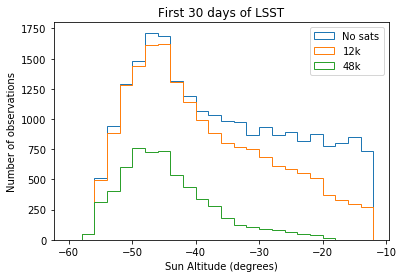

In [10]:
bins = np.arange(-60, -11, 2.)

ack = plt.hist(df_baseline['sunAlt'], bins=bins, label='No sats', fill=False, histtype='step')
ack = plt.hist(df['sunAlt'], bins=bins, label='12k', fill=False, histtype='step')

ack = plt.hist(df_super['sunAlt'], bins=bins, label='48k', fill=False, histtype='step')

plt.xlabel('Sun Altitude (degrees)')
plt.ylabel('Number of observations')
plt.title('First %i days of LSST' % df_baseline['night'].max())
plt.legend()
plt.savefig('obs_sunalt_hist.pdf')

In [11]:
print(f'Baseline has {df_baseline["sunAlt"].size} observations')
print(f'12k satellites has {df["sunAlt"].size} observations')
print(f'48k satellites has {df_super["sunAlt"].size} observations')


Baseline has 22662 observations
12k satellites has 18255 observations
48k satellites has 5956 observations
